<a href="https://colab.research.google.com/github/1961928/dgoh123.github.io/blob/main/Week9_Wine_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv('redwine.csv')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
x = df.drop('quality', axis=1)
y= df['quality']

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


clustering data

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [ ]:
clusters = kmeans.predict(x)
clusters

array([5, 5, 5, ..., 2, 5, 2], dtype=int32)

Applying dimensionality reduction

In [ ]:
pca = PCA(n_components=2)
red_x = pd.DataFrame(pca.fit_transform(x), columns=['col_1', 'col_2'])

In [ ]:
red_x

,col_1,col_2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


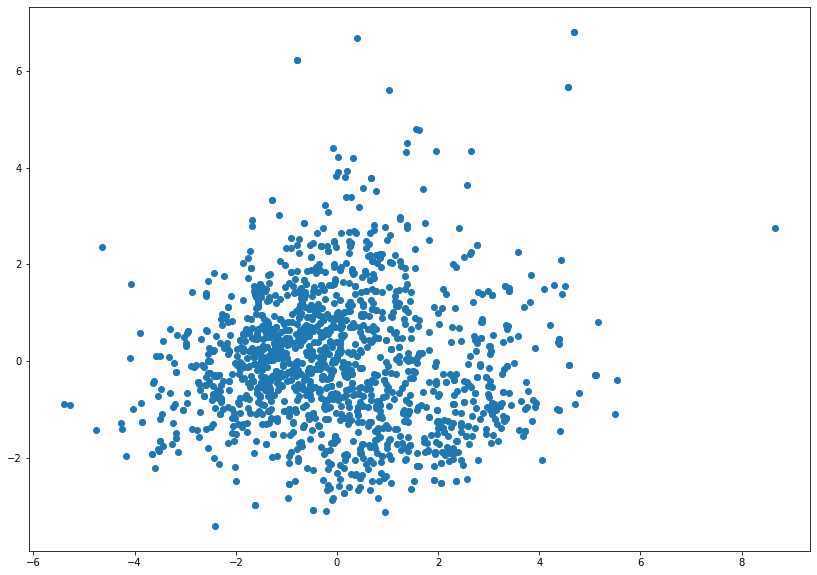

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(red_x['col_1'], red_x['col_2'])

In [ ]:
red_ctrs = pca.transform(kmeans.cluster_centers_)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
red_ctrs

array([[ 0.11064065,  1.44171805],
       [ 2.09301358, -0.98511952],
       [-1.30865968, -1.04239056],
       [ 3.59939563,  1.05498421],
       [ 1.30422908,  3.29919581],
       [-1.08051101,  0.01664714]])

col_1 in x axis and col_2 in y axis

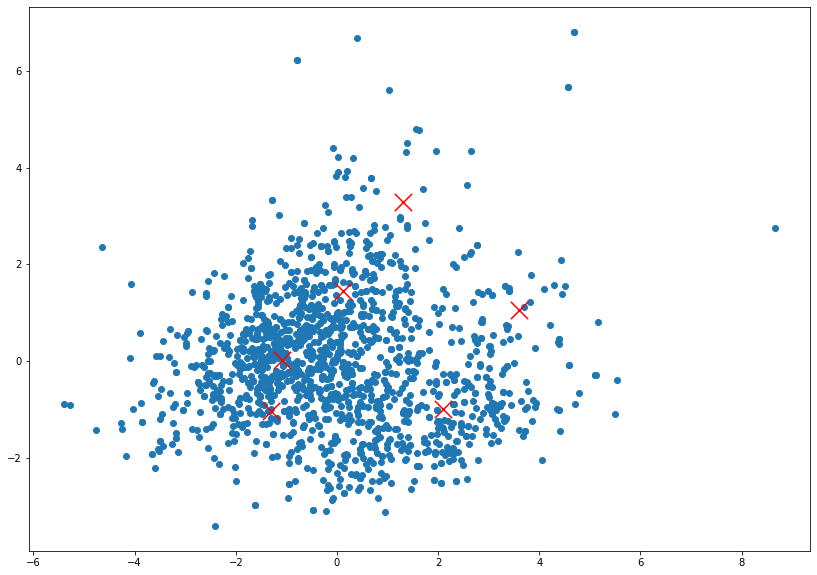

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(red_x['col_1'], red_x['col_2'])

plt.scatter(red_ctrs[:, 0], red_ctrs[:, 1], color='red', marker='x', s=300)
plt.show()

In [ ]:
red_x['cluster'] = clusters
red_x

,col_1,col_2,cluster
0,-1.619530,0.450950,5
1,-0.799170,1.856553,5
2,-0.748479,0.882039,5
3,2.357673,-0.269976,1
4,-1.619530,0.450950,5
...,...,...,...
1594,-2.150500,0.814286,5
1595,-2.214496,0.893101,2
1596,-1.456129,0.311746,2
1597,-2.270518,0.979791,5


identifying different clusters with color

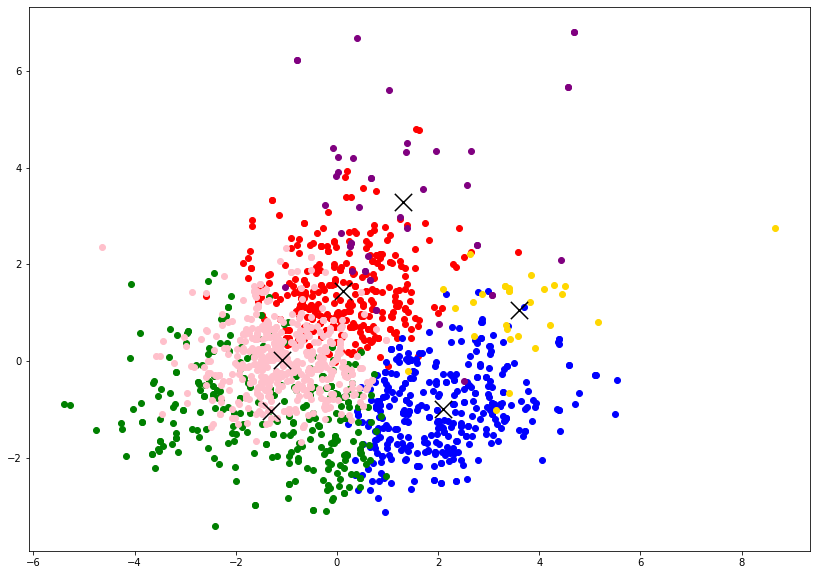

In [ ]:
plt.figure(figsize=(14,10))


plt.scatter(red_x[red_x['cluster'] == 0].loc[:, 'col_1'], red_x[red_x['cluster'] == 0].loc[:, 'col_2'], color='red')
plt.scatter(red_x[red_x['cluster'] == 1].loc[:, 'col_1'], red_x[red_x['cluster'] == 1].loc[:, 'col_2'], color='blue')
plt.scatter(red_x[red_x['cluster'] == 2].loc[:, 'col_1'], red_x[red_x['cluster'] == 2].loc[:, 'col_2'], color='green')
plt.scatter(red_x[red_x['cluster'] == 3].loc[:, 'col_1'], red_x[red_x['cluster'] == 3].loc[:, 'col_2'], color='gold')
plt.scatter(red_x[red_x['cluster'] == 4].loc[:, 'col_1'], red_x[red_x['cluster'] == 4].loc[:, 'col_2'], color='purple')
plt.scatter(red_x[red_x['cluster'] == 5].loc[:, 'col_1'], red_x[red_x['cluster'] == 5].loc[:, 'col_2'], color='pink')


plt.scatter(red_ctrs[:, 0], red_ctrs[:, 1], color='black', marker='x', s=300)
plt.show()

train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.75)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=600)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=600)

In [ ]:
print(f"accuracy: {model.score(X_test, y_test)}")

accuracy: 0.62


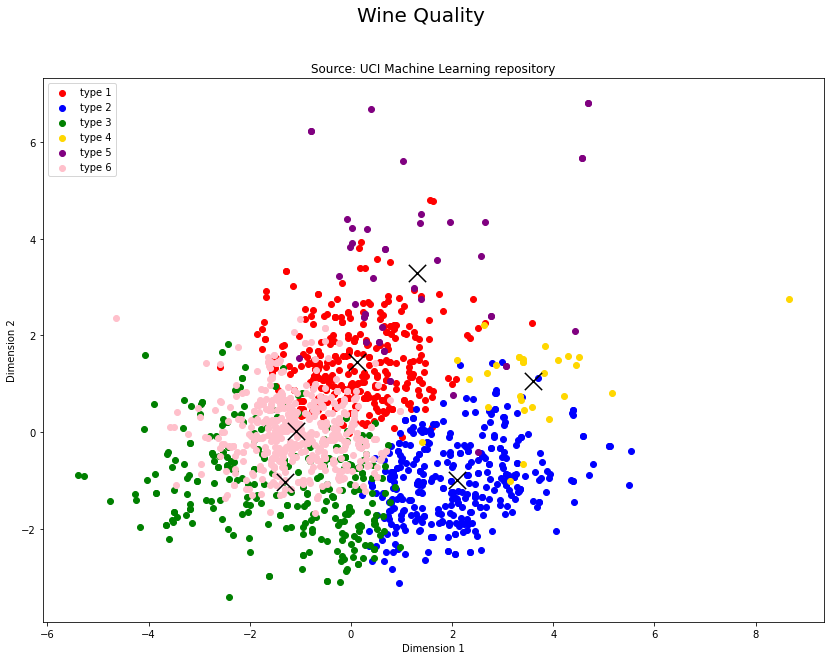

In [ ]:
plt.figure(figsize=(14,10))


plt.scatter(red_x[red_x['cluster'] == 0].loc[:, 'col_1'], red_x[red_x['cluster'] == 0].loc[:, 'col_2'], color='red', label='type 1')
plt.scatter(red_x[red_x['cluster'] == 1].loc[:, 'col_1'], red_x[red_x['cluster'] == 1].loc[:, 'col_2'], color='blue', label='type 2')
plt.scatter(red_x[red_x['cluster'] == 2].loc[:, 'col_1'], red_x[red_x['cluster'] == 2].loc[:, 'col_2'], color='green', label='type 3')
plt.scatter(red_x[red_x['cluster'] == 3].loc[:, 'col_1'], red_x[red_x['cluster'] == 3].loc[:, 'col_2'], color='gold', label='type 4')
plt.scatter(red_x[red_x['cluster'] == 4].loc[:, 'col_1'], red_x[red_x['cluster'] == 4].loc[:, 'col_2'], color='purple', label='type 5')
plt.scatter(red_x[red_x['cluster'] == 5].loc[:, 'col_1'], red_x[red_x['cluster'] == 5].loc[:, 'col_2'], color='pink', label='type 6')
plt.legend(loc="upper left")
plt.suptitle('Wine Quality', size=20)
plt.title('Source: UCI Machine Learning repository')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.scatter(red_ctrs[:, 0], red_ctrs[:, 1], color='black', marker='x', s=300)
plt.show()

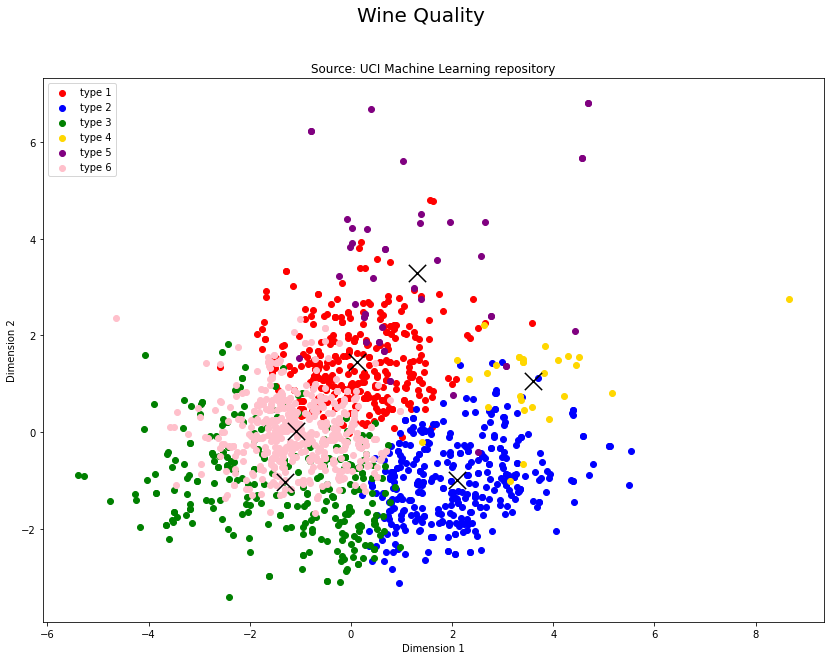

In [ ]:
plt.figure(figsize=(14,10))


plt.scatter(red_x[red_x['cluster'] == 0].loc[:, 'col_1'], red_x[red_x['cluster'] == 0].loc[:, 'col_2'], color='red', label='type 1')
plt.scatter(red_x[red_x['cluster'] == 1].loc[:, 'col_1'], red_x[red_x['cluster'] == 1].loc[:, 'col_2'], color='blue', label='type 2')
plt.scatter(red_x[red_x['cluster'] == 2].loc[:, 'col_1'], red_x[red_x['cluster'] == 2].loc[:, 'col_2'], color='green', label='type 3')
plt.scatter(red_x[red_x['cluster'] == 3].loc[:, 'col_1'], red_x[red_x['cluster'] == 3].loc[:, 'col_2'], color='gold', label='type 4')
plt.scatter(red_x[red_x['cluster'] == 4].loc[:, 'col_1'], red_x[red_x['cluster'] == 4].loc[:, 'col_2'], color='purple', label='type 5')
plt.scatter(red_x[red_x['cluster'] == 5].loc[:, 'col_1'], red_x[red_x['cluster'] == 5].loc[:, 'col_2'], color='pink', label='type 6')
plt.legend(loc="upper left")
plt.suptitle('Wine Quality', size=20)
plt.title('Source: UCI Machine Learning repository')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.scatter(red_ctrs[:, 0], red_ctrs[:, 1], color='black', marker='x', s=300)

plt.savefig('wine.svg', format='svg', dpi=1200, bbox_inches="tight")